# User Question 001

A new user asks:
> Suppose, for example, that there were two experimenters who worked together to collect data for a given session. I understand how to create an Experimenter table and how to make a Session table that includes one experimenter, but I don’t understand how one might indicate that there were multiple experimenters for a given session.

Okay, let's define a minimal example that answers this question.

First, let's create a new database schema:

In [1]:
import datajoint as dj
schema = dj.schema('test_question001')

Connecting dimitri@localhost:3306


First, let's define the `User` set to contain all the lab members who will conduct experiments and we will populate it with a few names.

In [2]:
@schema
class User(dj.Manual):
    definition = """
    username : varchar(20)
    ---
    full_name='' : varchar(60)    
    """

In [3]:
# these are just fake names
User.insert([
    ('ali', 'Ali Cameron'),
    ('david', 'David Petry'),
    ('pat', 'Patricia Avery')
])

In [4]:
User()

username,full_name
ali,Ali Cameron
david,David Petry
pat,Patricia Avery


Now let's define the `Session` set. Since there may be mulitple experimenters, we will not put the experimenter in the session. Rather, we will create a separate `Experimenter` set. 

In [5]:
@schema
class Session(dj.Manual):
    definition = """
    # Experiment session
    session : int  # session number
    ---
    session_date : date 
    """

In [6]:
@schema
class Experimenter(dj.Manual):
    definition = """
    # Persons performing experiments in the session
    -> Session
    -> User
    """

Note that both `Session` and `User` are in the primary key of `Experimenter`. This means that multiple users can be experimenters in each session. 

Let's add some sessions and experimenters that conducted them:

In [7]:
Session.insert((
    [1, '2018-04-09'],
    [2, '2019-02-07'],
    [3, '2019-03-31']
))

Experimenter.insert([
    (1, 'pat'),
    (1, 'ali'),
    (2, 'pat'),
    (3, 'pat'),
    (3, 'david')    
])

We are done! Here is our new schema:

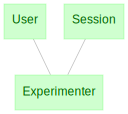

In [8]:
dj.Diagram(schema)

Let's try some queries: 

In [9]:
# All sessions
Session()

session session number,session_date
1,2018-04-09
2,2019-02-07
3,2019-03-31


In [10]:
# All Session x Experimenter combinations
Session * Experimenter * User

session session number,username,session_date,full_name
1,ali,2018-04-09,Ali Cameron
3,david,2019-03-31,David Petry
1,pat,2018-04-09,Patricia Avery
2,pat,2019-02-07,Patricia Avery
3,pat,2019-03-31,Patricia Avery


In [11]:
# All Sessions conducted by Ali
Session & (Experimenter & {'username': 'ali'})

session session number,session_date
1,2018-04-09
